In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
from datetime import date
from sklearn import datasets
from scipy import stats

In [23]:
def MTA_reader(file):
    """
    Reads and formats MTA turnstile data
    Input: .txt MTA turnstile file
    Output: returns DataFrame
    """
    path = file
    new_cols = ["C/A", "UNIT", "SCP", "STATION", "LINENAME", "DIVISION", "DATE", "TIME", "DESC", "ENTRIES", "EXITS"]
    MTA_turnstile_sample_data = pd.read_csv(path, sep=",", header=0, names=new_cols)
    MTA_turnstile_sample_data.dropna()
    
    return MTA_turnstile_sample_data

In [24]:
def MTA_cols_format(file):
    """
    Formats columns from MTA turnstile DataFrames using MTA_reader
    Input: .txt MTA turnstile file
    Output: returns formatted DataFrame 
    """
    dataframe = MTA_reader(file)
    dataframe["TIME"] = (pd.to_datetime(dataframe["TIME"])).dt.time
    dataframe["DAY_OF_WEEK"] = (pd.to_datetime(dataframe["DATE"])).dt.weekday_name
    dataframe["TURNSTILE_PASSES"] = (dataframe["ENTRIES"] + dataframe["EXITS"])/1000000 # dividing by 1 million for brevity

    return dataframe

In [25]:
### datasets for beginning of June from years 2015-2019 
path_150606 = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_150606.txt"
path_160604 = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160604.txt"
path_170610 = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_170610.txt"
path_180602 = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_180602.txt"
path_190601 = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt"

MTA_turnstile_data_150606 = MTA_cols_format(path_150606) # June 2015
MTA_turnstile_data_160604 = MTA_cols_format(path_160604) # June 2016
MTA_turnstile_data_170610 = MTA_cols_format(path_170610) # June 2017
MTA_turnstile_data_180602 = MTA_cols_format(path_180602) # June 2018
MTA_turnstile_data_190601 = MTA_cols_format(path_190601) # June 2019

In [26]:
### merge the datasets
MTA_turnstile_data_june = pd.concat([MTA_turnstile_data_150606, MTA_turnstile_data_160604, MTA_turnstile_data_160604,  MTA_cols_format(path_160604), MTA_turnstile_data_170610, MTA_turnstile_data_180602, MTA_turnstile_data_190601])


In [36]:
### highest traffic for June 2015-2019 is 61 ST WOOLSIDE with 3968.426617 million
### TURNSTILE_PASSES is divided by one million for brevity
MTA_turnstile_data_june["TURNSTILE_PASSES"].max() 
max_turnstile_station_june = MTA_turnstile_data_june[MTA_turnstile_data_june["TURNSTILE_PASSES"] == MTA_turnstile_data_june["TURNSTILE_PASSES"].max()]
max_turnstile_station_june.loc[:, "STATION"]


185161    61 ST WOODSIDE
Name: STATION, dtype: object

In [40]:
### top stations with most activity in June 2015-2019 
station_activity = MTA_turnstile_data_june.groupby("STATION", as_index = False)[["TURNSTILE_PASSES"]].max()
station_activity = station_activity.sort_values("TURNSTILE_PASSES", ascending = False)

n = 11 # get 1-n stations
station_activity_condensed = station_activity.iloc[0:n] 
top_stations = [station for station in station_activity["STATION"]]
print(top_stations[0:n])

['61 ST WOODSIDE', '47-50 STS ROCK', 'CHAMBERS ST', '23 ST-6 AVE', '23 ST', '42 ST-PA BUS TE', '42 ST-PORT AUTH', 'HIGH ST', '57 ST-7 AVE', '57 ST-7 AV', '183 ST']


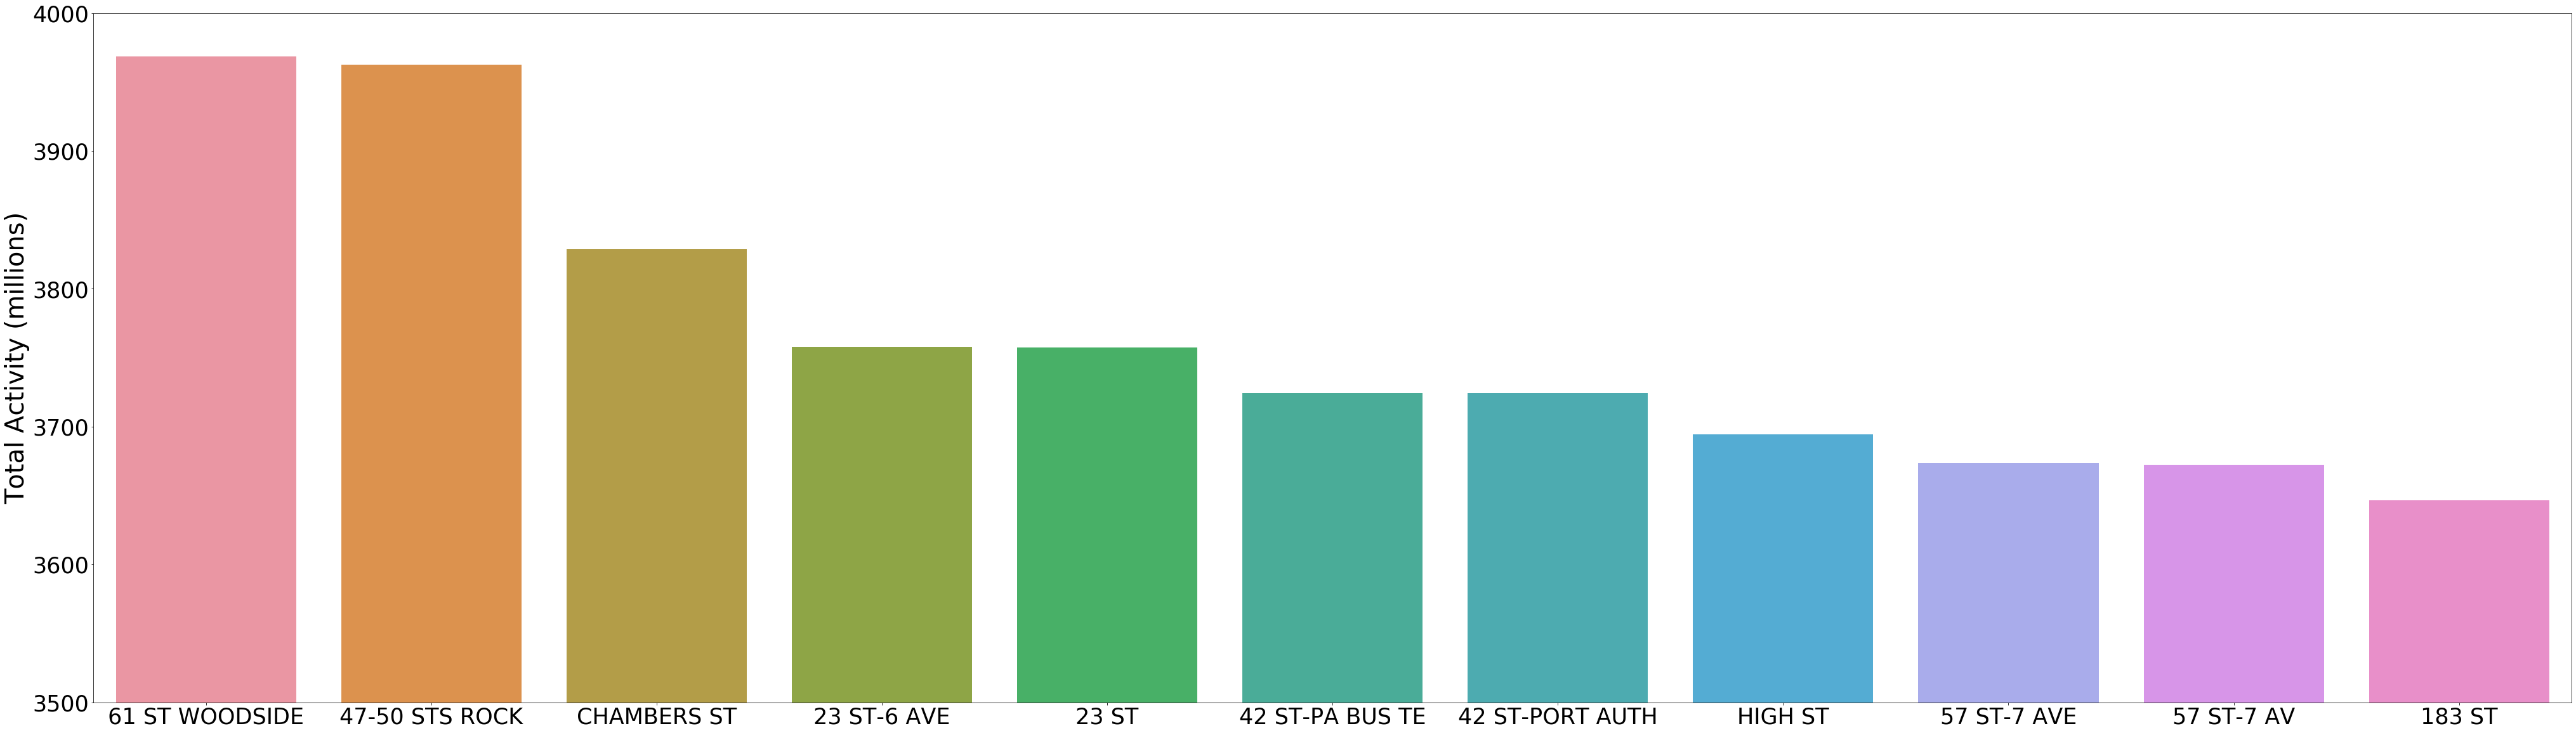

In [45]:
### plot the top n-1 stations with the most activity 
plt.figure(figsize=(70, 20))
activity_plot = sns.barplot(x = "STATION", y = "TURNSTILE_PASSES", data = station_activity_condensed);
activity_plot.set_xlabel(None);
activity_plot.set_ylabel("Total Activity (millions)",fontsize=40);
activity_plot.tick_params(labelsize=35)
activity_plot.title()
activity_plot.set(ylim=(3500, 4000));